Accuracy: 0.51
Classification Report:
              precision    recall  f1-score   support

           0       0.53      0.52      0.52       157
           1       0.49      0.50      0.49       143

    accuracy                           0.51       300
   macro avg       0.51      0.51      0.51       300
weighted avg       0.51      0.51      0.51       300

Confusion Matrix:
[[81 76]
 [71 72]]


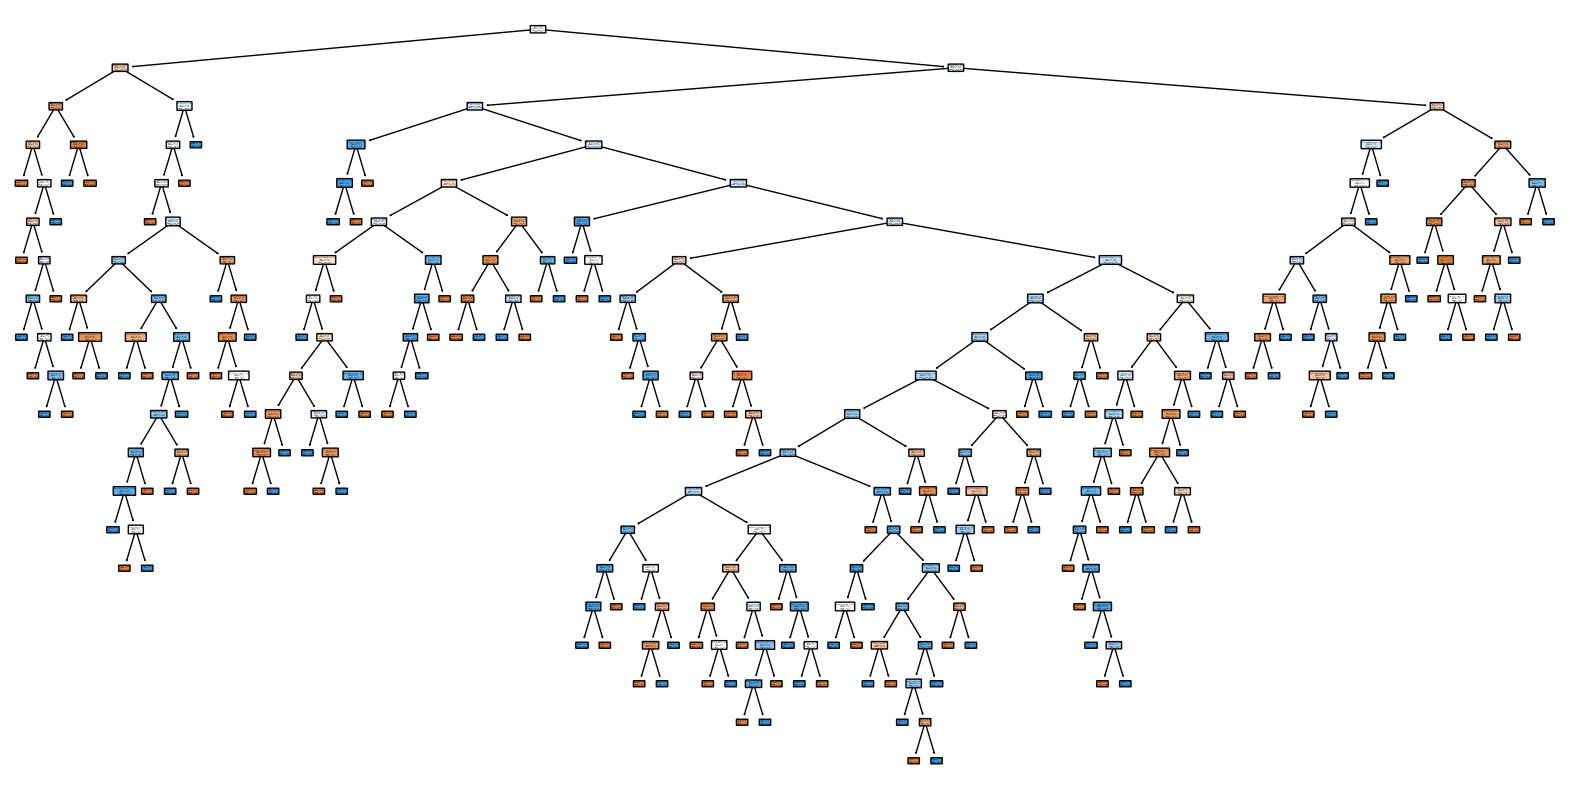

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Create a synthetic dataset
np.random.seed(42)

n_samples = 1000
data = {
    'age': np.random.randint(18, 70, size=n_samples),
    'job': np.random.choice(['admin.', 'technician', 'blue-collar', 'management', 'retired', 'services', 'entrepreneur', 'unemployed', 'housemaid', 'student', 'self-employed', 'unknown'], size=n_samples),
    'marital': np.random.choice(['married', 'single', 'divorced'], size=n_samples),
    'education': np.random.choice(['primary', 'secondary', 'tertiary', 'unknown'], size=n_samples),
    'default': np.random.choice(['yes', 'no'], size=n_samples),
    'balance': np.random.randint(-2000, 10000, size=n_samples),
    'housing': np.random.choice(['yes', 'no'], size=n_samples),
    'loan': np.random.choice(['yes', 'no'], size=n_samples),
    'contact': np.random.choice(['unknown', 'telephone', 'cellular'], size=n_samples),
    'day': np.random.randint(1, 31, size=n_samples),
    'month': np.random.choice(['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'], size=n_samples),
    'duration': np.random.randint(1, 5000, size=n_samples),
    'campaign': np.random.randint(1, 50, size=n_samples),
    'pdays': np.random.randint(-1, 500, size=n_samples),
    'previous': np.random.randint(0, 10, size=n_samples),
    'poutcome': np.random.choice(['unknown', 'other', 'failure', 'success'], size=n_samples),
    'y': np.random.choice(['yes', 'no'], size=n_samples)
}

df = pd.DataFrame(data)

# Convert categorical variables into dummy/indicator variables
df = pd.get_dummies(df, columns=['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome'], drop_first=True)

# Split the dataset into training and testing sets
X = df.drop('y', axis=1)
y = df['y'].apply(lambda x: 1 if x == 'yes' else 0)  # Convert target variable to binary

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Build the decision tree classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Predict on the test set
y_pred = clf.predict(X_test)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print('Classification Report:')
print(classification_report(y_test, y_pred))
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

# Visualize the decision tree
plt.figure(figsize=(20, 10))
plot_tree(clf, feature_names=X.columns, class_names=['no', 'yes'], filled=True, rounded=True)
plt.show()
